In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [9]:
df = pd.read_csv("Coffe_sales.csv")

# Menampilkan 5 baris pertama
print("=== 5 Baris Pertama ===")
print(df.head())

# Cek nama kolom
print("\n=== Nama Kolom ===")
print(df.columns)

=== 5 Baris Pertama ===
   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  

=== Nama Kolom ===
Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Month

In [10]:
# Melihat tipe data dan missing values
print("=== Info Dataset ===")
print(df.info())

# Cek jumlah data hilang
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None

=== Jumlah Missing Values ===
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [11]:
# Menentukan variabel X dan y
X = df[['hour_of_day']]  
y = df['money']          

# Menampilkan contoh nilai
print("Contoh nilai X:\n", X.head())
print("\nContoh nilai y:\n", y.head())


Contoh nilai X:
    hour_of_day
0           10
1           12
2           12
3           13
4           13

Contoh nilai y:
 0    38.7
1    38.7
2    38.7
3    28.9
4    38.7
Name: money, dtype: float64


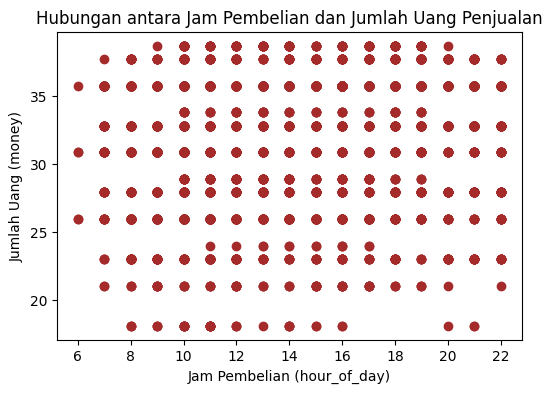

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='brown')  # scatter plot data
plt.xlabel("Jam Pembelian (hour_of_day)")
plt.ylabel("Jumlah Uang (money)")
plt.title("Hubungan antara Jam Pembelian dan Jumlah Uang Penjualan")
plt.show()


In [13]:
# Ambil hanya kolom yang relevan
df_filtered = df[['hour_of_day', 'money']].copy()

# Hitung IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Filter outlier berdasarkan IQR
condition = ~(
    (df_filtered < (Q1 - 1.5 * IQR)) |
    (df_filtered > (Q3 + 1.5 * IQR))
).any(axis=1)

filtered_df = df[condition]

print("Jumlah data awal :", len(df))
print("Jumlah setelah filter:", len(filtered_df))

# Update variabel untuk modeling
df = filtered_df
X = df[['hour_of_day']]
y = df['money']


Jumlah data awal : 3547
Jumlah setelah filter: 3547


In [14]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test :", len(X_test))


Jumlah data train: 2837
Jumlah data test : 710


In [15]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan hasil pelatihan model
print("Model regresi linear penjualan kopi berhasil dilatih.\n")
print("Intercept  :", model.intercept_)
print("Koefisien :", model.coef_[0])


Model regresi linear penjualan kopi berhasil dilatih.

Intercept  : 28.11778332930723
Koefisien : 0.24657825316193357


In [16]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print("R-squared :", r2)
print("RMSE      :", rmse)

=== Evaluasi Model ===
R-squared : 0.021162293388714337
RMSE      : 4.732078866926993


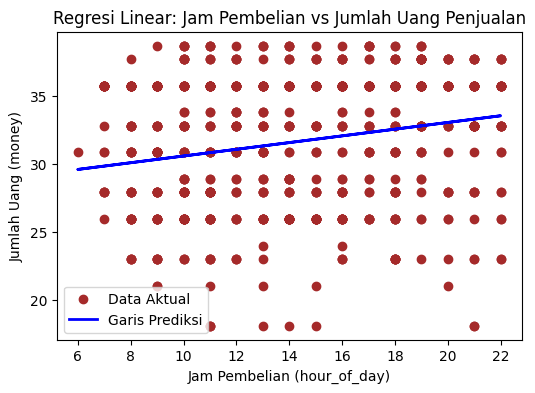

In [19]:
# Prediksi nilai y berdasarkan data uji
y_pred = model.predict(X_test)

# Visualisasi hasil regresi linear
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Data Aktual", color="brown")
plt.plot(X_test, y_pred, color="blue", label="Garis Prediksi", linewidth=2)
plt.xlabel("Jam Pembelian (hour_of_day)")
plt.ylabel("Jumlah Uang (money)")
plt.title("Regresi Linear: Jam Pembelian vs Jumlah Uang Penjualan")
plt.legend()
plt.show()


In [18]:
import joblib

# Simpan model regresi linear penjualan kopi
joblib.dump(model, "model_penjualan_kopi.pkl")

print("Model berhasil disimpan sebagai model_penjualan_kopi.pkl")


Model berhasil disimpan sebagai model_penjualan_kopi.pkl


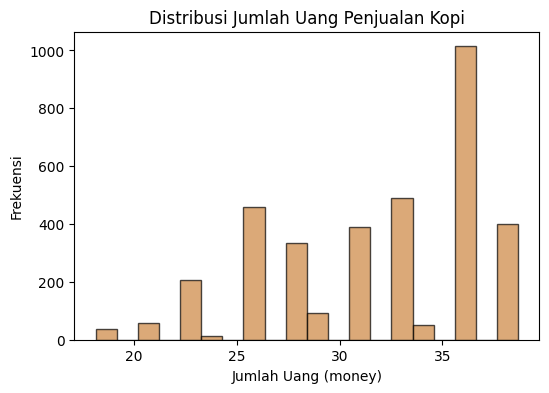

In [20]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7, color='peru')
plt.title("Distribusi Jumlah Uang Penjualan Kopi")
plt.xlabel("Jumlah Uang (money)")
plt.ylabel("Frekuensi")
plt.show()


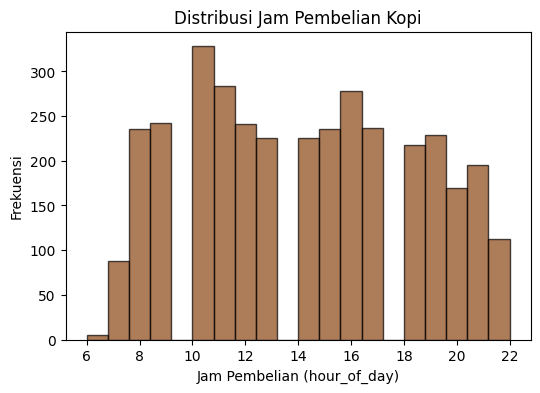

In [21]:
plt.figure(figsize=(6,4))
plt.hist(X, bins=20, edgecolor='black', alpha=0.7, color='saddlebrown')
plt.title("Distribusi Jam Pembelian Kopi")
plt.xlabel("Jam Pembelian (hour_of_day)")
plt.ylabel("Frekuensi")
plt.show()


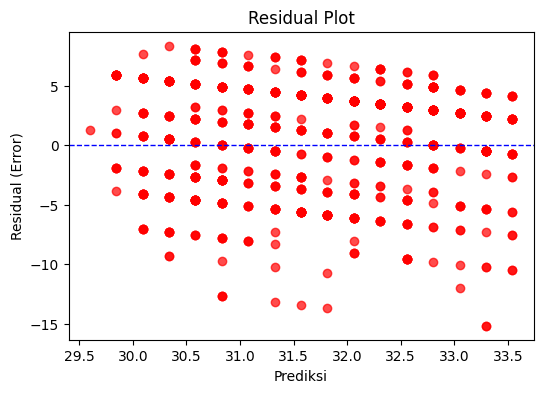

In [22]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, color="red")  # titik residual merah
plt.axhline(0, color="blue", linestyle="--", linewidth=1)  # garis acuan hitam biar kontras
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residual (Error)")
plt.show()

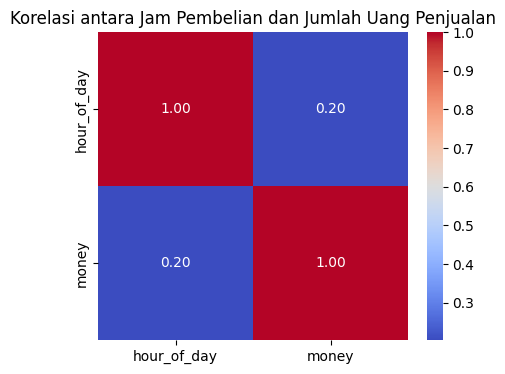

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(df[['hour_of_day', 'money']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Jam Pembelian dan Jumlah Uang Penjualan")
plt.show()


In [26]:
!pip install --upgrade scikit-learn==1.7.2

In [27]:
import sklearn
print(sklearn.__version__)

1.7.2


In [24]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
